<a href="https://colab.research.google.com/github/yharshityadav/IPL-Machine-Learning-Model/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required library

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('IPL.csv')
df

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 19,2024",Rajasthan,Kolkata,Kolkata,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
70,71,"May 21,2024",Hyderabad,Kolkata,Hyderabad,Bat,159,10,164,2,Kolkata,Mitchell Starc,Shreyas Iyer,Mitchell Starc
71,72,"May 22,2024",Banglore,Rajasthan,Rajasthan,Field,172,8,174,6,Rajasthan,Ravichandran Ashwin,Yashasvi Jaiswal,Avesh Khan
72,73,"May 24,2024",Hyderabad,Rajasthan,Rajasthan,Field,175,9,139,7,Hyderabad,Shahbaz Ahmed,Dhruv Jurel,Shahbaz Ahmed


In [16]:
df.drop(columns=['id','date','toss_winner','decision','most_runs','most_wkts'],axis=1,inplace=True)

In [17]:
drop_duplicate = df[df.duplicated()]
drop_duplicate

,team1,team2,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match


In [18]:
df.dropna()

,team1,team2,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match
0,Banglore,Chennai,173,6,176,4,Chennai,Mustafizur Rahman
1,Delhi,Punjab,174,9,177,6,Punjab,Sam Curran
2,Kolkata,Hyderabad,208,7,204,7,Kolkata,Andre Russell
3,Rajasthan,Lucknow,193,4,173,6,Rajasthan,Sanju Samson
4,Gujarat,Mumbai,168,6,162,9,Gujarat,Sai Sudharsan
...,...,...,...,...,...,...,...,...
68,Punjab,Hyderabad,214,5,215,6,Hyderabad,Abhishek Sharma
70,Hyderabad,Kolkata,159,10,164,2,Kolkata,Mitchell Starc
71,Banglore,Rajasthan,172,8,174,6,Rajasthan,Ravichandran Ashwin
72,Hyderabad,Rajasthan,175,9,139,7,Hyderabad,Shahbaz Ahmed


In [19]:
df.drop(columns=['player_of_the_match'],axis=1,inplace=True)

In [20]:
df

,team1,team2,first_score,first_wkts,second_score,second_wkts,winner
0,Banglore,Chennai,173,6,176,4,Chennai
1,Delhi,Punjab,174,9,177,6,Punjab
2,Kolkata,Hyderabad,208,7,204,7,Kolkata
3,Rajasthan,Lucknow,193,4,173,6,Rajasthan
4,Gujarat,Mumbai,168,6,162,9,Gujarat
...,...,...,...,...,...,...,...
69,Rajasthan,Kolkata,0,0,0,0,Abandoned
70,Hyderabad,Kolkata,159,10,164,2,Kolkata
71,Banglore,Rajasthan,172,8,174,6,Rajasthan
72,Hyderabad,Rajasthan,175,9,139,7,Hyderabad


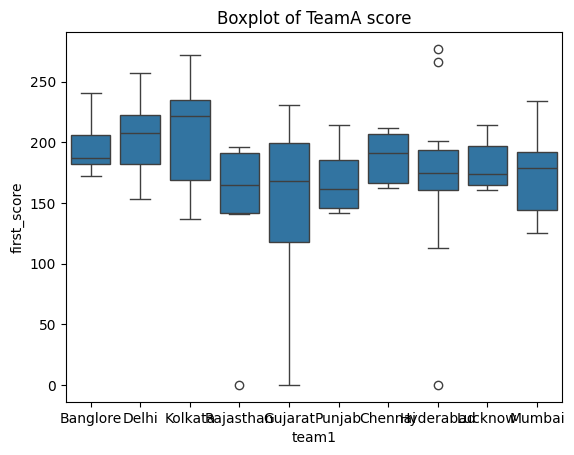

In [28]:
sns.boxplot(x='team1',y='first_score',data=df)
plt.title('Boxplot of TeamA score')
plt.show()

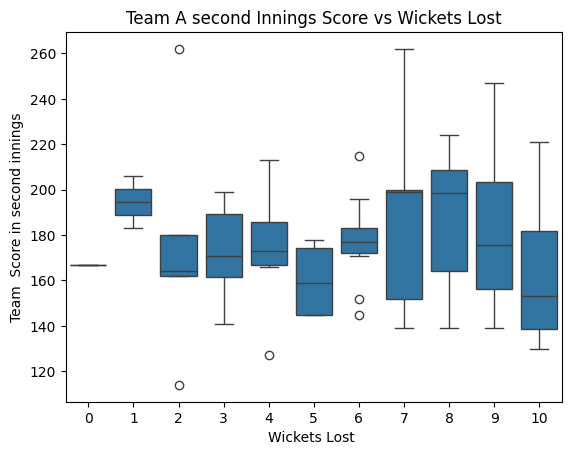

In [43]:
sns.boxplot(y='second_score', x='second_wkts', data=df)
plt.title('Team A second Innings Score vs Wickets Lost')
plt.xlabel('Wickets Lost ')
plt.ylabel('Team  Score in second innings')
plt.show()

In [44]:
q1 = df.select_dtypes(include = np.number).quantile(0.25)
q3 = df.select_dtypes(include = np.number).quantile(0.75)
iqr = q3 - q1
print(iqr)


first_score     43.0
first_wkts       3.0
second_score    47.0
second_wkts      4.0
dtype: float64


In [45]:
A = df.select_dtypes(include = np.number) > (q3+1.5*iqr)
B = df.select_dtypes(include = np.number) < (q1-1.5*iqr)
df = df[~(A | B).any(axis=1)]


In [46]:
q1 = df.select_dtypes(include = np.number).quantile(0.25)
q3 = df.select_dtypes(include = np.number).quantile(0.75)
iqr = q3 - q1
print(iqr)


first_score     43.0
first_wkts       3.0
second_score    47.0
second_wkts      4.0
dtype: float64


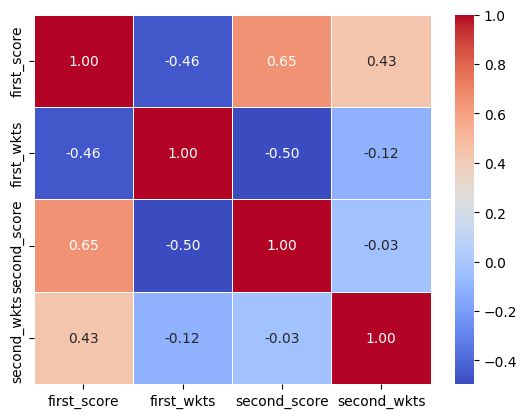

In [47]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.show()

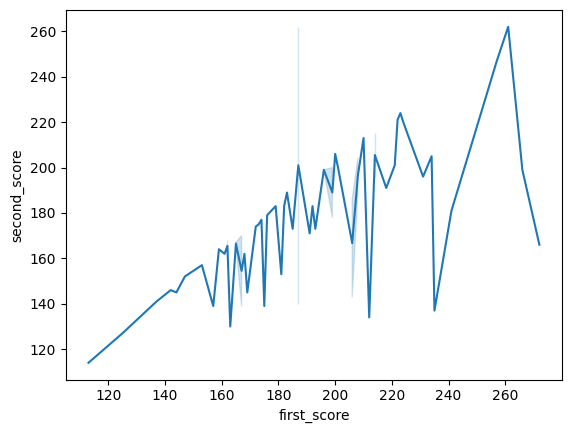

In [48]:
sns.lineplot(x='first_score',y='second_score',data=df)
plt.show()

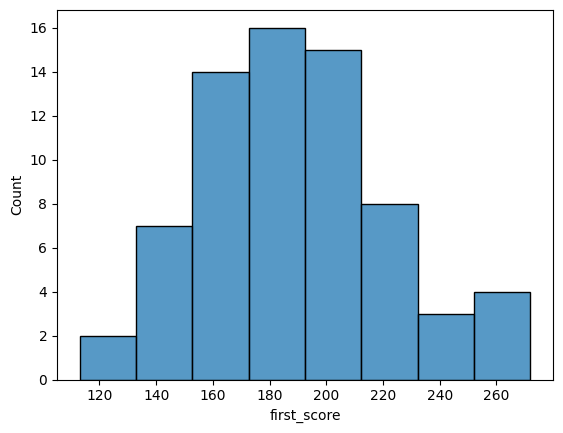

In [49]:
sns.histplot(x='first_score',data=df)
plt.show()